<a href="https://colab.research.google.com/github/sfansaria/file/blob/main/Dijkstra's_algorithm_visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install matplotlib networkx imageio


In [27]:
#import libraries and set-up the ability to draw with a helper function:

import networkx as nx
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import shutil
import heapq


def draw_graph(G, node_colors, edge_colors, pos, frame_id):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color = node_colors, edge_color = edge_colors, with_labels=True, node_size = 800, font_size = 16)
    plt.savefig(f"frames/frame_{frame_id:03d}.png")
    plt.close()

In [35]:
#Implement the algorithm and animate the process:

def animate_dijkstra(graph, start_node):
    os.makedirs("frames", exist_ok=True)
    frame_id = 0

    pos = nx.spring_layout(graph, seed=42)
    visited = {node: False for node in graph.nodes}
    distances = {node: float("inf") for node in graph.nodes}
    distances[start_node] = 0
    pq = [(0, start_node)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if visited[current_node]:
            continue


        visited[current_node] = True

        #Draw the graph at this step

        node_colors = ["green" if node == current_node else ("red" if visited[node] else "gray") for node in graph.nodes]
        edge_colors = ["black" for edge in graph.edges]

        draw_graph(graph, node_colors, edge_colors, pos, frame_id)
        frame_id += 1

        for neighbor, edge_weight in graph[current_node].items():
            new_distance = current_distance + edge_weight["weight"]

            if not visited[neighbor] and new_distance < distances[neighbor]:
              distances[neighbor] = new_distance
              heapq.heappush(pq, (new_distance, neighbor))

    #Generate the animated  GIF

    images = []

    for i in range(frame_id):
        images.append(imageio.imread(f"frames/frame_{i:03d}.png"))
    imageio.mimsave("dijkstra.gif", images, duration=1)

    #Clean up the frames folder

    shutil.rmtree("frames")


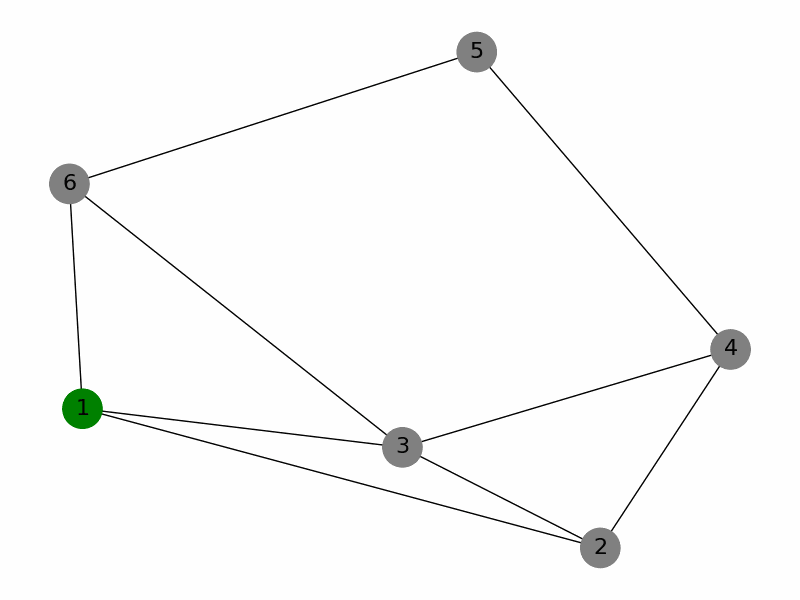

In [38]:
#Create a weighted graph

G = nx.Graph()

G.add_weighted_edges_from([(1, 2, 7), (1, 3, 9), (1, 6, 14), (2, 3, 10), (2, 4, 15), (3, 4, 11), (3, 6, 2), (4, 5, 6), (5, 6, 9)])


animate_dijkstra(G, 1)


from IPython.display import Image

Image(filename="dijkstra.gif")